## Affine Transformation

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'


In [37]:
def creatRectangle():
    image = np.zeros((200,200,3),dtype='uint8')
    topLeft = (50,50)
    bottomRight = (100,100)

    cv2.rectangle(image,topLeft,bottomRight,(0,155,155),-1)
    
    plt.imshow(image)
    plt.title("Rectangle")
    plt.show()
    outDim = image.shape[0:2]

# Shear

[1 k] 
[0 1]

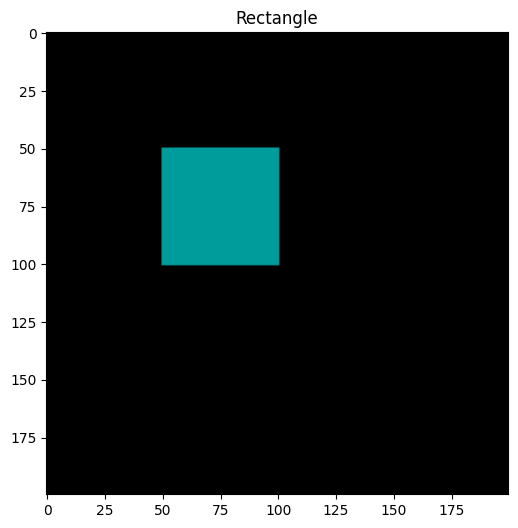

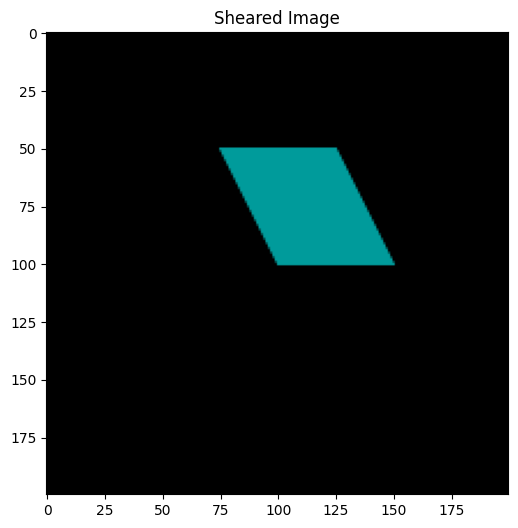

In [38]:
creatRectangle()
shearMat = np.float32([
    [1, 0.5, 0],
    [0, 1.0, 0]
])

shearedImage = cv2.warpAffine(image,shearMat,outDim)
plt.imshow(shearedImage)
plt.title("Sheared Image")
plt.show()

# Scale

[1.5 0] 
[0 1.5]

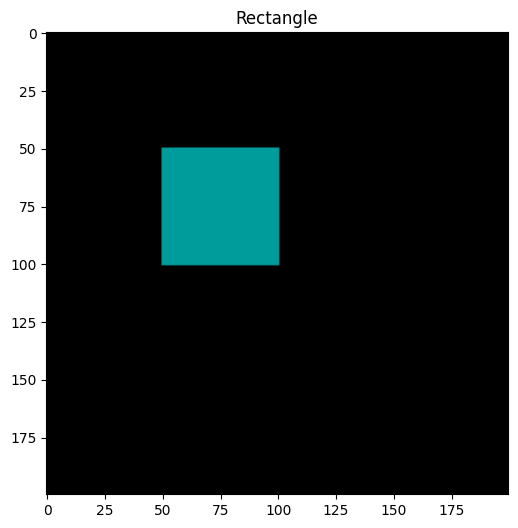

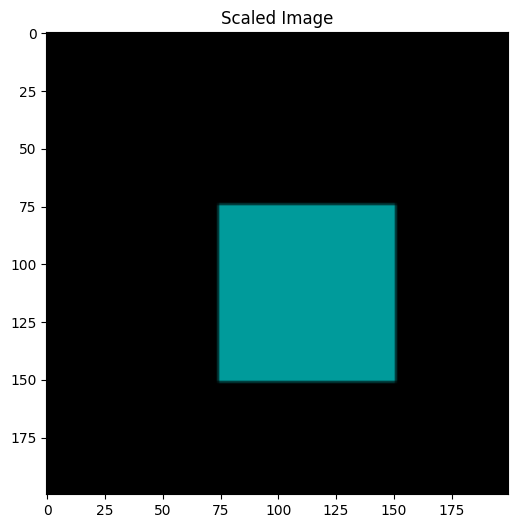

In [40]:
creatRectangle()
scaleMat = np.float32([
    [1.5, 0, 0],
    [0, 1.5, 0]
])

scaledImage = cv2.warpAffine(image,scaleMat,outDim)
plt.imshow(scaledImage)
plt.title("Scaled Image")
plt.show()

# Rotation

[cos𝜃 sin𝜃 0]
[-sin𝜃 cos𝜃 0]

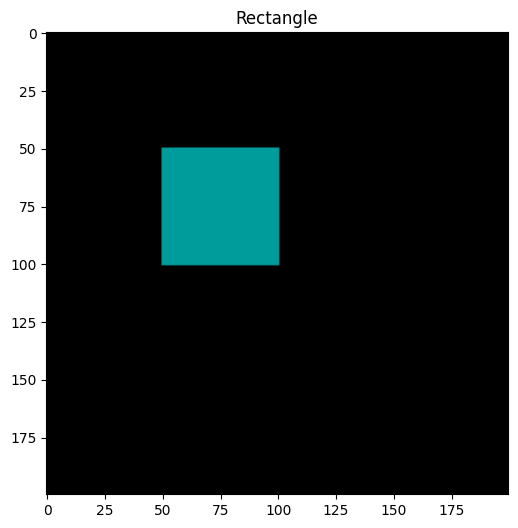

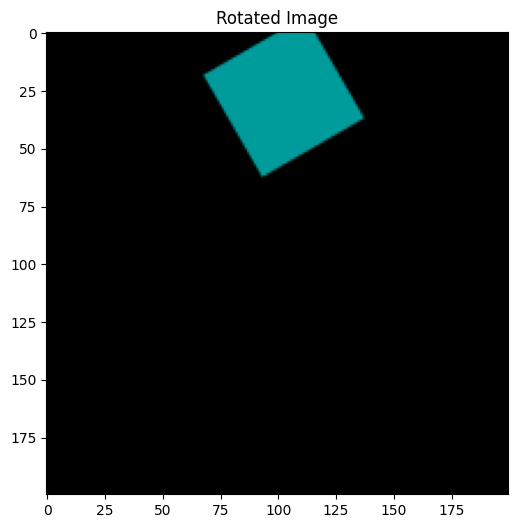

In [43]:
creatRectangle()
rotationDegree = -30
rotationRadians = rotationDegree * np.pi / 180.0

cosTheta = np.cos(rotationRadians)
sinTheta = np.sin(rotationRadians)

rotationMat = np.float32([
    [cosTheta, -sinTheta, 0],
    [sinTheta, cosTheta, 0]
])

rotatedImage = cv2.warpAffine(image,rotationMat,outDim)
plt.imshow(rotatedImage)
plt.title("Rotated Image")
plt.show()

# Translation

[1 0 25] 
[0 1 25]

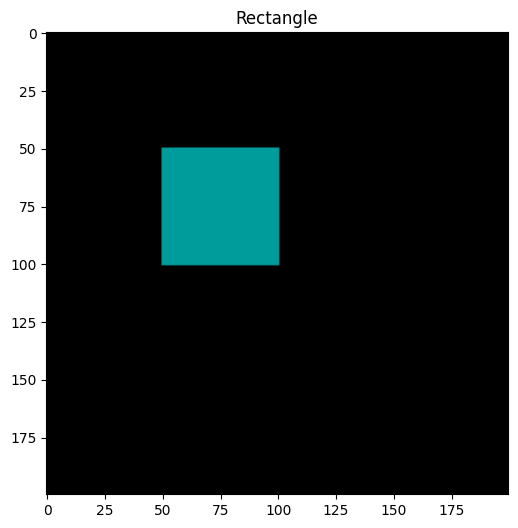

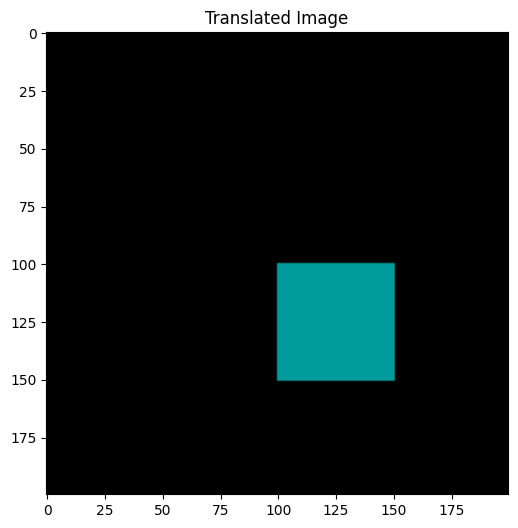

In [45]:
creatRectangle()
translationMat = np.float32([
    [1, 0, 50],
    [0, 1, 50]
])

translatedImage = cv2.warpAffine(image,translationMat,outDim)
plt.imshow(translatedImage)
plt.title("Translated Image")
plt.show()

## Shear, Scale, Rotation, Translation

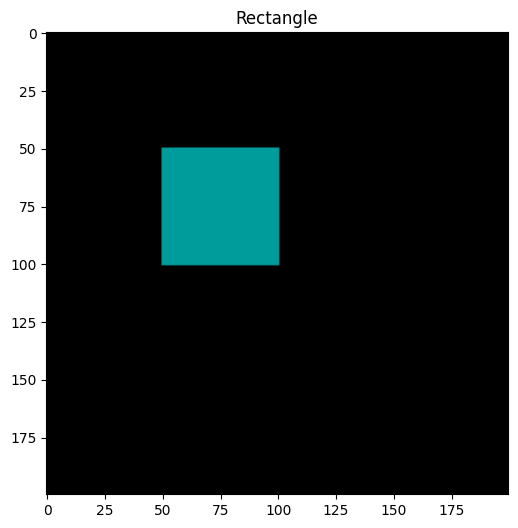

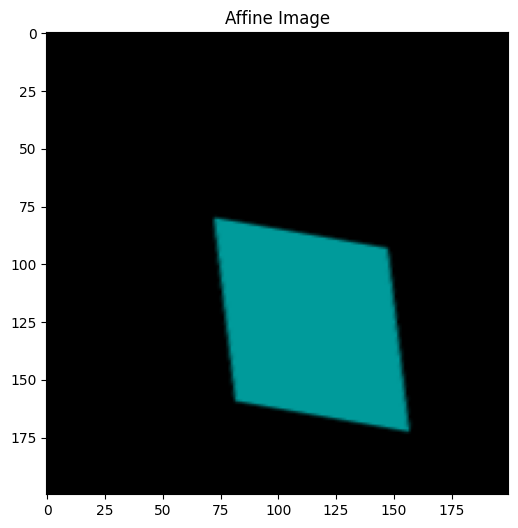

In [52]:
creatRectangle()
shearMat = np.float32([
    [1, 0.3, 0],
    [0, 1.0, 0]
])

shearedImage = cv2.warpAffine(image,shearMat,outDim)

scaleMat = np.float32([
    [1.5, 0, 0],
    [0, 1.5, 0]
])

scaledImage = cv2.warpAffine(shearedImage,scaleMat,outDim)

rotationDegree = 10
rotationRadians = rotationDegree * np.pi / 180.0

cosTheta = np.cos(rotationRadians)
sinTheta = np.sin(rotationRadians)

rotationMat = np.float32([
    [cosTheta, -sinTheta, 0],
    [sinTheta, cosTheta, 0]
])

rotatedImage = cv2.warpAffine(scaledImage,rotationMat,outDim)

translationMat = np.float32([
    [1, 0, -10],
    [0, 1, -10]
])

translatedImage = cv2.warpAffine(rotatedImage,translationMat,outDim)

plt.imshow(translatedImage)
plt.title('Affine Image')
plt.show()

## Affine Matrix

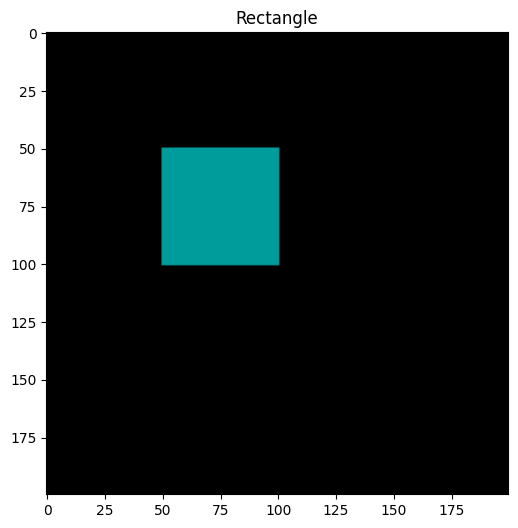

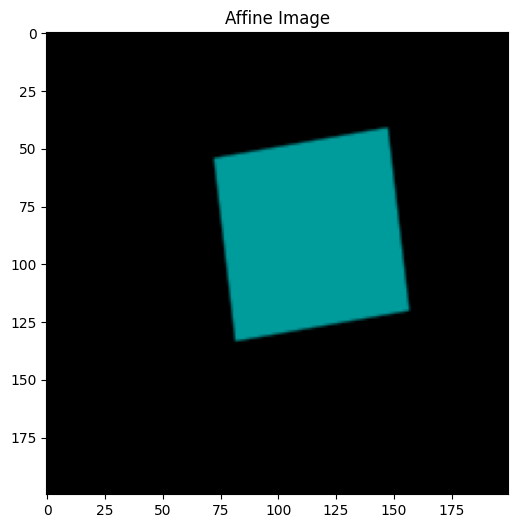

In [55]:
scaleX = 1.5
scaleY = 1.5

rotationRadians = 10*np.pi/180
cosTheta = np.cos(rotationRadians)
sinTheta = np.sin(rotationRadians)

tranlsate = -10

shear = 0.3

affineMatrix = np.float32([
    [scaleX*cosTheta, shear*scaleY*cosTheta - scaleY*sinTheta, tranlsate],
    [-scaleX*sinTheta, shear*scaleY*sinTheta + scaleY*cosTheta, tranlsate]
])

creatRectangle()

affineImage = cv2.warpAffine(image,affineMatrix,outDim)

plt.imshow(affineImage)
plt.title('Affine Image')
plt.show()


## Homography

In [59]:
from dataPath import DATA_PATH

# Read source image.
im_src = cv2.imread(DATA_PATH+'images/book2.jpg')
# Four corners of the book in source image
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)

# Read destination image.
im_dst = cv2.imread(DATA_PATH+'images/book1.jpg')
# Four corners of the book in destination image.
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)


h, status = cv2.findHomography(pts_src, pts_dst)

im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))

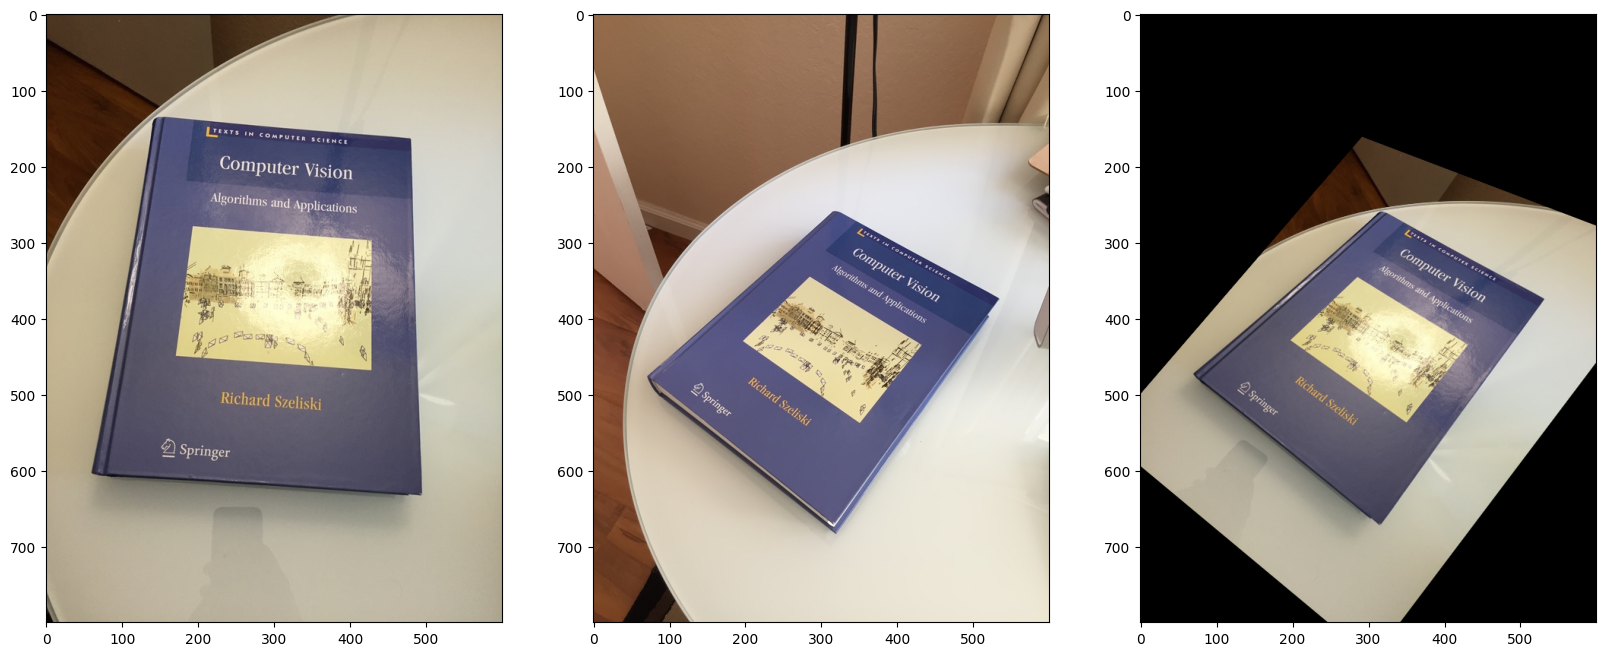

In [60]:
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(im_src[...,::-1])

plt.subplot(132)
plt.imshow(im_dst[...,::-1])

plt.subplot(133)
plt.imshow(im_out[...,::-1])